In [1]:
from sklearn.preprocessing import StandardScaler
import matplotlib.pylab as plt
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from scipy.fftpack import dct, idct
%matplotlib inline

In [2]:
def split_and_rescale ( X ):
    scaler = StandardScaler()
    scaler.fit(X)
    X_scaled = scaler.transform( X )
    return X_scaled

In [3]:
df=pd.read_csv('data/2018-01-01__2019-01-01__NConservatory__allMerged.csv')

In [4]:
#choosing desired sensor values
y1=df['temp_1'].values
y2=df['co2_1'].values
y3=df['dew_1'].values
y4=df['relH_1'].values

In [5]:
#preprocessing
y1_scaled = split_and_rescale(y1.reshape(-1, 1))
y2_scaled = split_and_rescale(y2.reshape(-1, 1))
y3_scaled = split_and_rescale(y3.reshape(-1, 1))
y4_scaled = split_and_rescale(y4.reshape(-1, 1))

In [6]:
#suming the function
y=y1_scaled+y2_scaled+y3_scaled+y4_scaled

In [7]:
from scipy.fftpack import dct, idct

In [8]:
# Discrete cosine transform
y_dct = dct(np.squeeze(y), norm='ortho')

In [9]:
window = np.zeros(len(y_dct))
window[:1000] = 1
yr = idct(y_dct*window, norm='ortho')

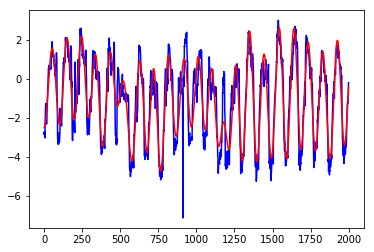

In [10]:
plt.plot(y[0:2000],'b')
plt.plot(yr[0:2000],'r')

In [11]:
c=np.squeeze(y)-yr #finding the error 
# when the deviation from the predictetd output from actual output is too much, then the data point is an outlier
x_out=np.where(np.abs(c)>8*np.std(np.abs(c))) 
y_out=np.abs(c[np.where(np.abs(c)>8*np.std(np.abs(c)))])
x_out=np.reshape(x_out,(y_out.shape))

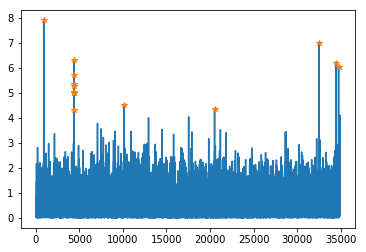

In [12]:
#plotting the outliers
plt.plot(np.abs(c))
plt.plot(x_out,y_out,'*')